## Capstone Project: Banking Income Binary Classification

### importing Modules

In [1]:
import chardet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Reading 

In [3]:
with open('maincapstoneproj.csv', 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']
print(f"Detected encoding: {encoding}")

Detected encoding: ascii


In [4]:
df = pd.read_csv('maincapstoneproj.csv', encoding=encoding)

In [5]:
df

,Age,workclass,fnlwgt,Education,education-num,Martial-Status,Occupation,relationship,race,sex,capital-gain,capital-loss,hour-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Data Cleaning or Manipulation 

In [6]:
df.iloc[27]

Age                                54
workclass                           ?
fnlwgt                         180211
Education                Some-college
education-num                      10
Martial-Status     Married-civ-spouse
Occupation                          ?
relationship                  Husband
race               Asian-Pac-Islander
sex                              Male
capital-gain                        0
capital-loss                        0
hour-per-week                      60
native-country                  South
Salary                           >50K
Name: 27, dtype: object

In [7]:
def replacemode(x, mode_value):
    if x ==' ?':
        return mode_value
    else:
        return x

def replacemean(x, mean_value):
    if pd.isnull(x):
        return mean_value
    else:
        return x




def update(column):
    if column.dtype == 'O': 
        mode_value = column.mode()[0]
        return column.apply(lambda x:replacemode(x, mode_value))
    else:  
        mean_value = column.mean()
        return column.apply(lambda x:replacemean(x, mean_value))


for col in df.columns:
    df[col] = update(df[col])

print("\nUpdated DataFrame:")
print(df)
df.to_csv('maincapstoneproj.csv', index=False)

print("\nDataFrame saved to 'maincapstoneproj.csv'.")


Updated DataFrame:
       Age          workclass  fnlwgt    Education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            Martial-Status          Occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1  

In [8]:
df.iloc[27]

Age                                54
workclass                     Private
fnlwgt                         180211
Education                Some-college
education-num                      10
Martial-Status     Married-civ-spouse
Occupation             Prof-specialty
relationship                  Husband
race               Asian-Pac-Islander
sex                              Male
capital-gain                        0
capital-loss                        0
hour-per-week                      60
native-country                  South
Salary                           >50K
Name: 27, dtype: object

### Exploratory Data Analysis(EDA)

#### Classifying into two categories based in their data types
Numerical - Age,fnlwgt,education-num,capital-gain,capital-loss,hour-per-week

Categorical - workclass,Education,Martial-Status,Occupation,relationship,race,sex,Salary

### Univariate Analysis on numerical columns

In [9]:
df.isnull().sum()

Age               0
workclass         0
fnlwgt            0
Education         0
education-num     0
Martial-Status    0
Occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hour-per-week     0
native-country    0
Salary            0
dtype: int64

#### Age

In [10]:
df['Age'].describe()  

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

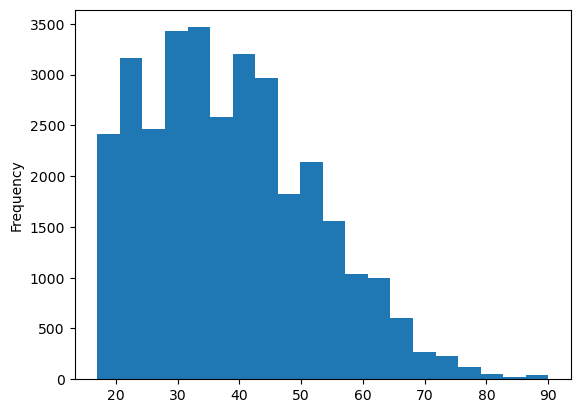

In [11]:
df['Age'].plot(kind='hist', bins=20) 

<Axes: ylabel='Density'>

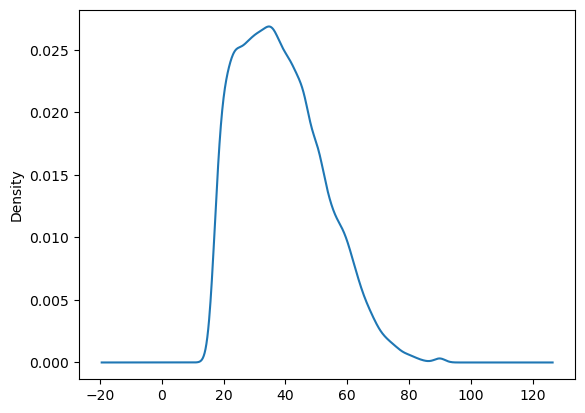

In [12]:
df['Age'].plot(kind='kde')

In [13]:
df['Age'].skew()  

0.5587433694130484

<Axes: >

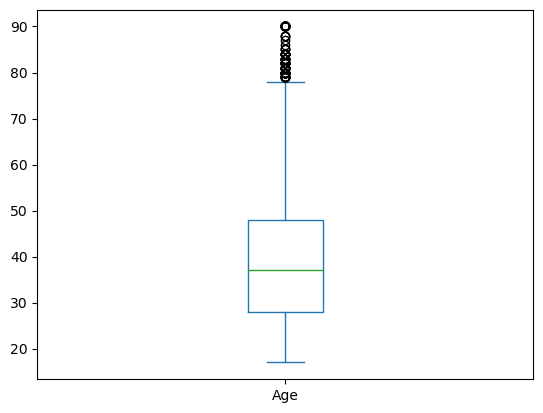

In [14]:
df['Age'].plot(kind='box')

In [15]:
df[df['Age'] > 77]

,Age,workclass,fnlwgt,Education,education-num,Martial-Status,Occupation,relationship,race,sex,capital-gain,capital-loss,hour-per-week,native-country,Salary
74,79,Private,124744,Some-college,10,Married-civ-spouse,Prof-specialty,Other-relative,White,Male,0,0,20,United-States,<=50K
222,90,Private,51744,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,2206,40,United-States,<=50K
430,80,Private,107762,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Male,0,0,24,United-States,<=50K
918,81,Self-emp-not-inc,136063,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,30,United-States,<=50K
978,78,Private,182977,HS-grad,9,Widowed,Other-service,Not-in-family,Black,Female,2964,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32277,90,Private,313749,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,25,United-States,<=50K
32367,90,Local-gov,214594,7th-8th,4,Married-civ-spouse,Protective-serv,Husband,White,Male,2653,0,40,United-States,<=50K
32459,85,Private,98611,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,Poland,<=50K
32494,82,Private,403910,HS-grad,9,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,3,United-States,<=50K


### Conclusions 

- Age is normally(Almost) distributed
- 0% of values are missing 
- There are some outliers

### fnlwgt 

In [18]:
df['fnlwgt'].describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

<Axes: ylabel='Frequency'>

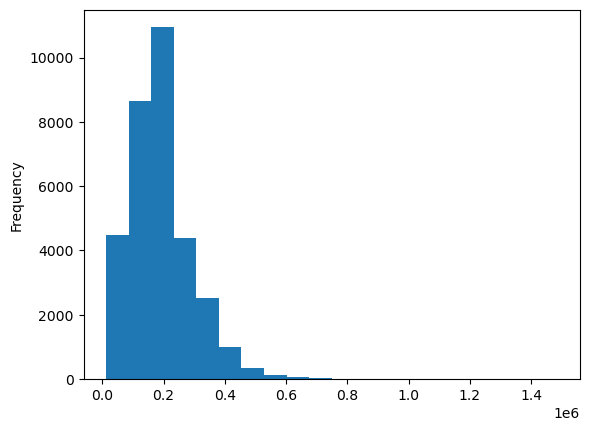

In [19]:
df['fnlwgt'].plot(kind='hist', bins=20)

<Axes: ylabel='Density'>

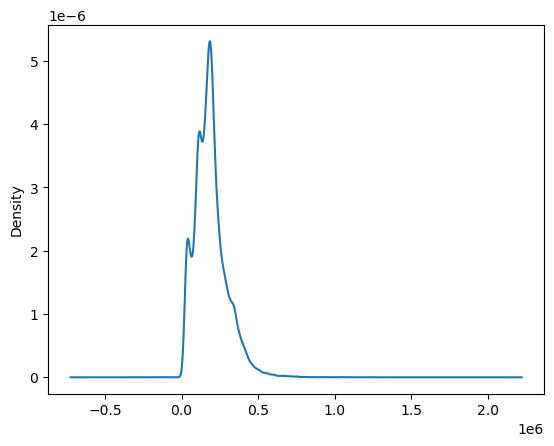

In [20]:
df['fnlwgt'].plot(kind='kde')

In [21]:
df['fnlwgt'].skew()

1.4469800945789826

<Axes: >

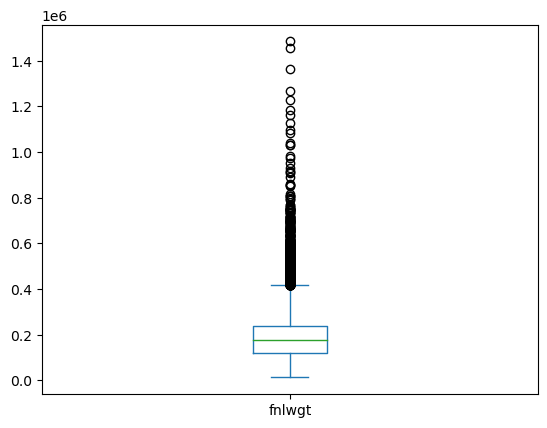

In [22]:
df['fnlwgt'].plot(kind='box')

In [23]:
df[df['fnlwgt'] >40000]

,Age,workclass,fnlwgt,Education,education-num,Martial-Status,Occupation,relationship,race,sex,capital-gain,capital-loss,hour-per-week,native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### Conclusions
- fnlwgt is less Distributed
- 0% of values are missing
- There are more outliers
- Box plot is slightly squeezed

### education-num

In [24]:
df['education-num'].describe()

count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64

<Axes: ylabel='Frequency'>

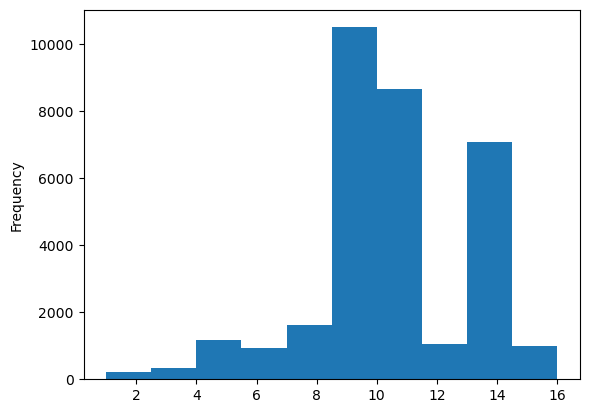

In [25]:
df['education-num'].plot(kind='hist', bins=10)

<Axes: ylabel='Density'>

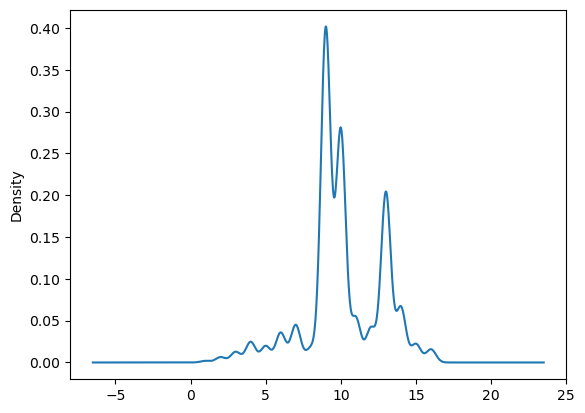

In [26]:
df['education-num'].plot(kind='kde')

In [27]:
df['education-num'].skew()

-0.3116758679102297

<Axes: >

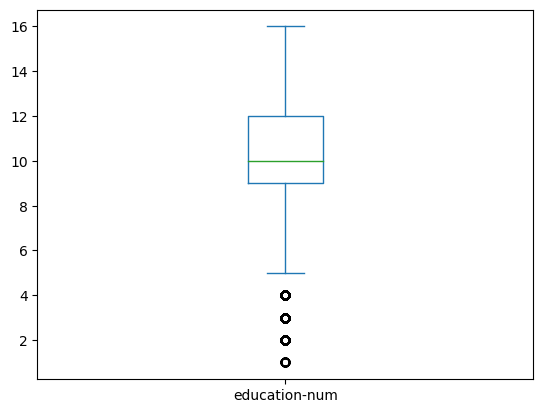

In [28]:
df['education-num'].plot(kind='box')

In [29]:
df[df['education-num'] < 5]

,Age,workclass,fnlwgt,Education,education-num,Martial-Status,Occupation,relationship,race,sex,capital-gain,capital-loss,hour-per-week,native-country,Salary
15,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,<=50K
56,46,Private,216666,5th-6th,3,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
61,32,Private,293936,7th-8th,4,Married-spouse-absent,Prof-specialty,Not-in-family,White,Male,0,0,40,United-States,<=50K
79,31,Local-gov,125927,7th-8th,4,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<=50K
160,68,Private,38317,1st-4th,2,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,20,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32431,51,Private,274502,7th-8th,4,Divorced,Machine-op-inspct,Not-in-family,White,Female,0,0,48,United-States,<=50K
32432,36,Private,208068,Preschool,1,Divorced,Other-service,Not-in-family,Other,Male,0,0,72,Mexico,<=50K
32448,61,Private,137554,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
32479,64,State-gov,222966,7th-8th,4,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,40,United-States,<=50K


### Conclusions

- eduaction-num is almost distributed
- 0% of values are missing
- There are some outliers

### capital-gain

In [31]:
df['capital-gain'].describe()

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

<Axes: ylabel='Frequency'>

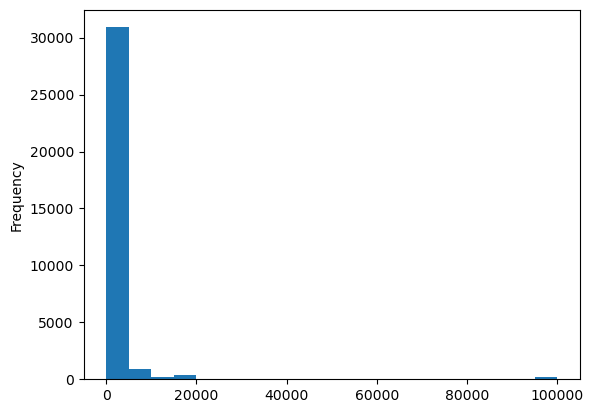

In [32]:
df['capital-gain'].plot(kind='hist', bins=20)

<Axes: ylabel='Density'>

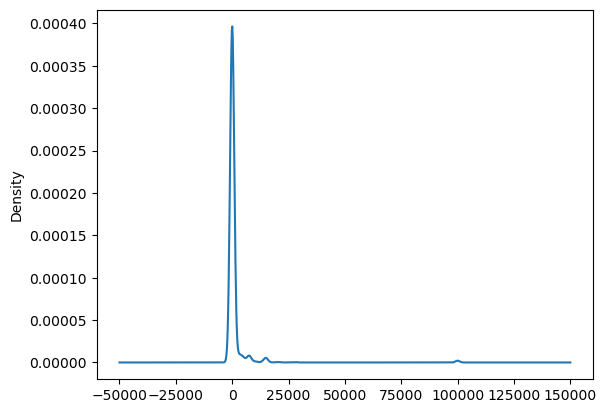

In [33]:
df['capital-gain'].plot(kind='kde')

In [34]:
df['capital-gain'].skew()

11.953847687699799

<Axes: >

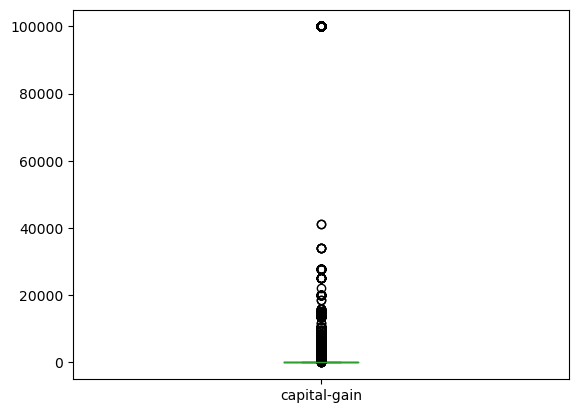

In [35]:
df['capital-gain'].plot(kind='box')

### Conclusions

- capital-gain is slightly Distributed
- 0% of values are missing
- There are mostly outliers
- Box plot is also overlapped 

### Capital-loss

In [37]:
df['capital-loss'].describe()

count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

<Axes: ylabel='Frequency'>

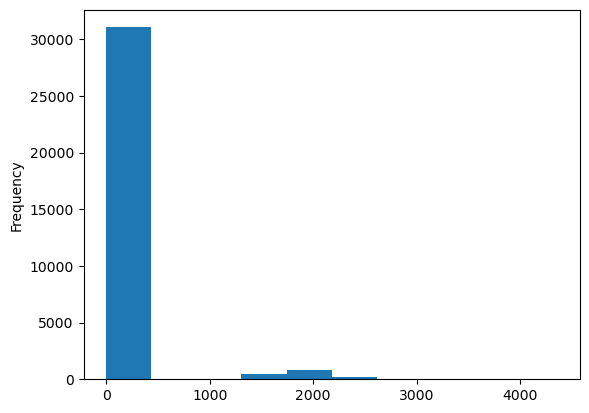

In [38]:
df['capital-loss'].plot(kind='hist', bins=10)


<Axes: ylabel='Density'>

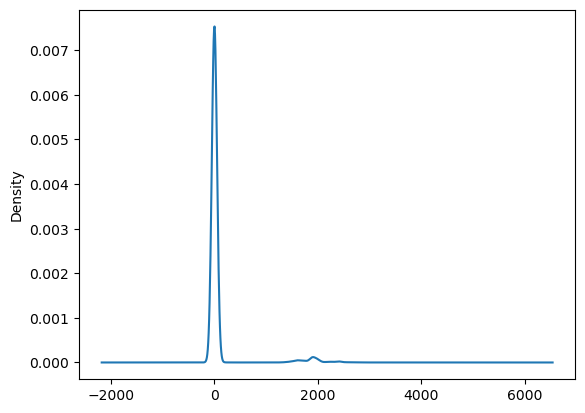

In [39]:
df['capital-loss'].plot(kind='kde')


In [40]:
df['capital-loss'].skew()


4.594629121679692

<Axes: >

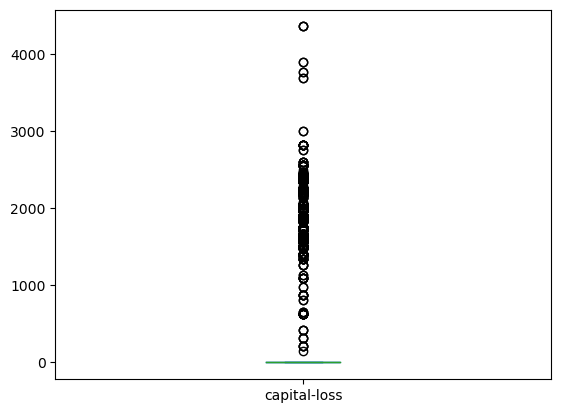

In [41]:
df['capital-loss'].plot(kind='box')


### Conclusions

- fnlwgt is slightly Distributed
- 0% of values are missing
- There are only outliers
- box plot is also overlapped

### hour-per-week

In [42]:
df['hour-per-week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hour-per-week, dtype: float64

<Axes: ylabel='Frequency'>

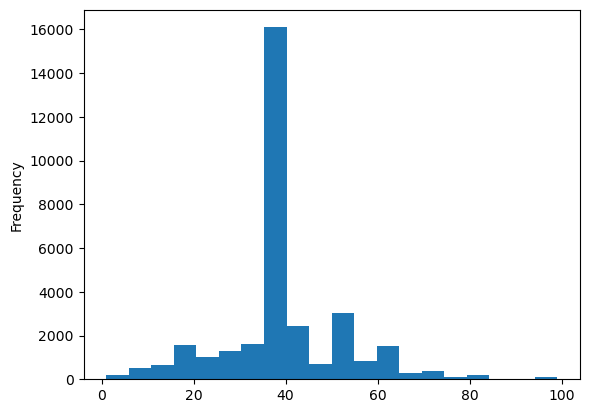

In [43]:
df['hour-per-week'].plot(kind='hist', bins=20)

<Axes: ylabel='Density'>

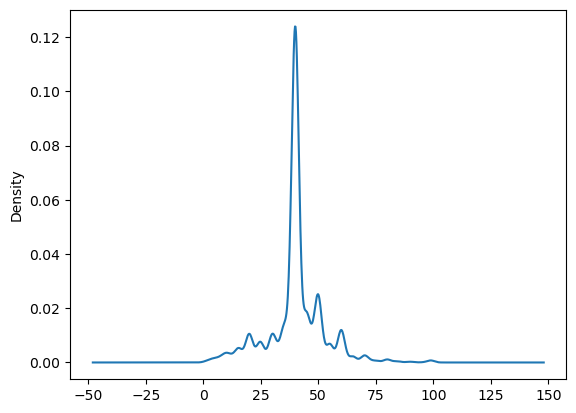

In [44]:
df['hour-per-week'].plot(kind='kde')

In [45]:
df['hour-per-week'].skew()

0.22764253680450092

<Axes: >

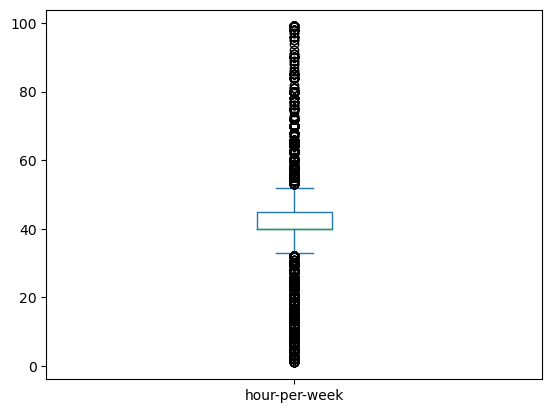

In [46]:
df['hour-per-week'].plot(kind='box')

### Conclusions
- hour-per-week is less Distributed
- 0% of values are missing
- There are outliers on below minimum and above maximum but there are more outliers on above maximum
- box plot is also squeezed

## Bivariate Analysis

### Categorical - Categorical

In [47]:
pd.crosstab(df['Salary'],df['Education'],normalize='columns')*100 

Education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
Salary,,,,,,,,,,,,,,,,
<=50K,93.35477,94.893617,92.378753,96.428571,95.195195,93.80805,94.747082,75.164011,73.878437,58.524743,25.90799,84.049138,44.341265,100.0,26.5625,80.976546
>50K,6.64523,5.106383,7.621247,3.571429,4.804805,6.19195,5.252918,24.835989,26.121563,41.475257,74.09201,15.950862,55.658735,0.0,73.4375,19.023454


### Conclusions

it is clearly visible that in Preschool category all the people's salary is less than 50k

In [48]:
pd.crosstab(df['Salary'],df['sex'],normalize='columns')*100

sex,Female,Male
Salary,,
<=50K,89.053941,69.426342
>50K,10.946059,30.573658


Here i am observing that male's are less compare to female's in less then 50k Category 
 and males are more than females in the Greater than salary Category

### Numerical - Categorical

#### Salary and Age

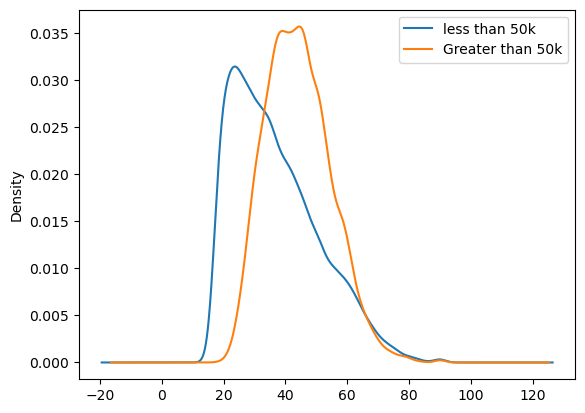

In [50]:
df[df['Salary'] == ' <=50K']['Age'].plot(kind='kde', label = 'less than 50k')
df[df['Salary'] == ' >50K']['Age'].plot(kind='kde', label = 'Greater than 50k')    
plt.legend()   
plt.show()

### Conclusions
Here what i am observing is when age is between 5-25 people's salary is equally distributed 
and if age is 25-65 people's salary is more than people below 25 and if age is 65-80 people's salary is less than 65 age  

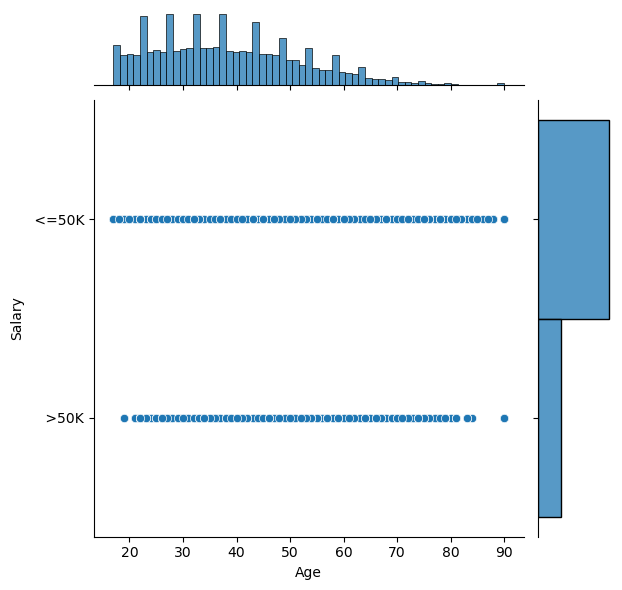

In [51]:
sns.jointplot(x='Age',y='Salary',data=df)

Here I am observing that Histogram is right skewed and most of the people if i take threshold as 60 are majorly earning both less than 50k and 
Greater than 50k here in scatter plot it is observed that people are more in less than 50k Category compare to Greater than 50K and some people above
85-90 are earning in both the Categories

## Data PreProcessing 
- Encoding
- Finding Correlation
- Handling the Outliers
- implementing Standardization and Normalization

## Encoding

In [52]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Readingthe data from a file
file_path = 'maincapstoneproj.csv'
X_cols = pd.read_csv(file_path)

# Applying Label Encoding
label_encoders = {}
for column in X_cols.columns:
    if X_cols[column].dtype == 'object':  # Applying only to categorical columns
        le = LabelEncoder()
        X_cols[column] = le.fit_transform(X_cols[column])
        label_encoders[column] = le

# Displaying the transformed DataFrame
print(X_cols)
X_cols.to_csv('maincapstoneproj.csv', index=False)

print("\nDataFrame saved to 'maincapstoneproj.csv'.")

       Age  workclass  fnlwgt  Education  education-num  Martial-Status  \
0       39          6   77516          9             13               4   
1       50          5   83311          9             13               2   
2       38          3  215646         11              9               0   
3       53          3  234721          1              7               2   
4       28          3  338409          9             13               2   
...    ...        ...     ...        ...            ...             ...   
32556   27          3  257302          7             12               2   
32557   40          3  154374         11              9               2   
32558   58          3  151910         11              9               6   
32559   22          3  201490         11              9               4   
32560   52          4  287927         11              9               2   

       Occupation  relationship  race  sex  capital-gain  capital-loss  \
0               0        

## Handling the Outliers

In [53]:
X_cols.head()

,Age,workclass,fnlwgt,Education,education-num,Martial-Status,Occupation,relationship,race,sex,capital-gain,capital-loss,hour-per-week,native-country,Salary
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0


In [54]:
numeric_columns = [
    'Age', 
    'workclass', 
    'fnlwgt', 
    'Education', 
    'education-num', 
    'Martial-Status', 
    'Occupation', 
    'relationship', 
    'race', 
    'sex', 
    'capital-gain', 
    'capital-loss',                                             
    'hour-per-week', 
    'native-country'
]

# Processing each column
for column in numeric_columns:
    # Calculating the IQR (Interquartile Range)
    Q1 = X_cols[column].quantile(0.25)
    Q3 = X_cols[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replacing the outliers with the median
    median = X_cols[column].median()
    X_cols.loc[(X_cols[column] < lower_bound) | (X_cols[column] > upper_bound), column] = median

# Display the DataFrame after processing
print(X_cols)
X_cols.to_csv('maincapstoneproj.csv', index=False)+

print("\nDataFrame saved to 'maincapstoneproj.csv'.")

       Age  workclass  fnlwgt  Education  education-num  Martial-Status  \
0       39          3   77516          9             13               4   
1       50          3   83311          9             13               2   
2       38          3  215646         11              9               0   
3       53          3  234721         11              7               2   
4       28          3  338409          9             13               2   
...    ...        ...     ...        ...            ...             ...   
32556   27          3  257302          7             12               2   
32557   40          3  154374         11              9               2   
32558   58          3  151910         11              9               6   
32559   22          3  201490         11              9               4   
32560   52          3  287927         11              9               2   

       Occupation  relationship  race  sex  capital-gain  capital-loss  \
0               0        

In [55]:
X_cols.corr()

,Age,workclass,fnlwgt,Education,education-num,Martial-Status,Occupation,relationship,race,sex,capital-gain,capital-loss,hour-per-week,native-country,Salary
Age,1.000000,NaN,-0.062446,-0.094936,0.106013,-0.282267,-0.000199,-0.266553,NaN,0.090192,NaN,NaN,0.047285,NaN,0.242480
workclass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,-0.062446,NaN,1.000000,-0.003562,-0.020013,0.026079,-0.000557,0.005013,NaN,0.021126,NaN,NaN,-0.004864,NaN,-0.003348
Education,-0.094936,NaN,-0.003562,1.000000,-0.116004,0.025373,-0.029194,0.058153,NaN,-0.042490,NaN,NaN,-0.024273,NaN,-0.031453
education-num,0.106013,NaN,-0.020013,-0.116004,1.000000,-0.068413,0.087928,-0.125006,NaN,0.031836,NaN,NaN,0.122328,NaN,0.341799
Martial-Status,-0.282267,NaN,0.026079,0.025373,-0.068413,1.000000,0.034962,0.185451,NaN,-0.129314,NaN,NaN,-0.092201,NaN,-0.199307
Occupation,-0.000199,NaN,-0.000557,-0.029194,0.087928,0.034962,1.000000,-0.037451,NaN,0.047461,NaN,NaN,0.022929,NaN,0.034625
relationship,-0.266553,NaN,0.005013,0.058153,-0.125006,0.185451,-0.037451,1.000000,NaN,-0.582454,NaN,NaN,-0.163753,NaN,-0.250918
race,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,0.090192,NaN,0.021126,-0.042490,0.031836,-0.129314,0.047461,-0.582454,NaN,1.000000,NaN,NaN,0.158717,NaN,0.215980


## Applying Min-max Scaler

In [56]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['Age', 'workclass', 'fnlwgt', 'Education', 'education-num',
    'Martial-Status', 'Occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hour-per-week', 'native-country', 'Salary']

scaler_minmax = MinMaxScaler()
X_cols_normalized = X_cols.copy()  # Create a copy of the original DataFrame
X_cols_normalized[columns_to_scale] = scaler_minmax.fit_transform(X_cols[columns_to_scale])

In [57]:
print("\nNormalized DataFrame:\n", X_cols_normalized)
X_cols_normalized.to_csv('maincapstoneproj.csv', index=False)
print("\nDataFrame saved to 'maincapstoneproj.csv'.")


Normalized DataFrame:
             Age  workclass    fnlwgt  Education  education-num  \
0      0.360656        0.0  0.161638        0.4       0.727273   
1      0.540984        0.0  0.175998        0.4       0.727273   
2      0.344262        0.0  0.503915        0.6       0.363636   
3      0.590164        0.0  0.551182        0.6       0.181818   
4      0.180328        0.0  0.808114        0.4       0.727273   
...         ...        ...       ...        ...            ...   
32556  0.163934        0.0  0.607136        0.2       0.636364   
32557  0.377049        0.0  0.352087        0.6       0.363636   
32558  0.672131        0.0  0.345982        0.6       0.363636   
32559  0.081967        0.0  0.468838        0.6       0.363636   
32560  0.573770        0.0  0.683023        0.6       0.363636   

       Martial-Status  Occupation  relationship  race  sex  capital-gain  \
0            0.666667    0.000000           0.2   0.0  1.0           0.0   
1            0.333333    0.2307

## Feature Engineering
- Selecting the unwanted Features 
- Dropping the unwanted Features

In [7]:
columns_to_drop = ['workclass', 'race', 'capital-gain','Occupation','capital-loss','hour-per-week','native-country']

# Drop the specified columns from scaled_df
data_dropped = X_cols_normalized.drop(columns=columns_to_drop, errors='ignore')

# Now data_dropped contains the scaled dataset without the dropped features
print(data_dropped.head())
data_dropped.to_csv('maincapstoneproj.csv', index=False)

print("\nDataFrame saved to 'maincapstoneproj.csv'.")


NameError: name 'X_cols_normalized' is not defined

### Spliting the data 

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data_dropped.drop('Salary',axis=1), 
                                                    data_dropped['Salary'], test_size=0.30, 
                                                    random_state=101,stratify =data_dropped['Salary'] )

NameError: name 'data_dropped' is not defined

In [62]:
from sklearn.linear_model import LogisticRegression

In [63]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [64]:
predictions = logmodel.predict(X_test)

In [65]:
from sklearn.metrics import classification_report

In [66]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88      7436
         1.0       0.67      0.37      0.48      2333

    accuracy                           0.81      9769
   macro avg       0.75      0.66      0.68      9769
weighted avg       0.79      0.81      0.78      9769



In [67]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.8060190398198382

## Decision Tree Classifier 

In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
dtree = DecisionTreeClassifier()

In [72]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [73]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtree.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9953053703053703


In [74]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtree.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.772852902037056


In [75]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtree,data_dropped.drop('Salary',axis=1),data_dropped['Salary'],cv=5)

In [76]:
score.mean()

0.7629679640907187

## Random Forest 

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [79]:
y_pred = rfc.predict(X_test)

In [80]:
accuracy = accuracy_score(y_test, y_pred)

In [81]:
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


## Gradient Boosting

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [83]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [84]:
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [86]:
y_pred = gb_classifier.predict(X_test)

In [87]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.83


## Best Score 83%